## Solving second order differential equation

### Mesh grading

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
start = 0
dx = 0.05
stop = 30
x = np.arange(start,stop,dx)
n = np.size(x)

Define first normal derivative operator as :
$$
\begin{pmatrix}
-1/\epsilon & 1/\epsilon & 0 & ... & 0\\
0 & -1/\epsilon & 1/\epsilon & ... & 0\\
0 & 0 & -1/\epsilon  & 1/\epsilon ... & 0\\
... & ... & ... & ... & ...\\
1/\epsilon & ... & ... & 0 & -1/\epsilon 
\end{pmatrix}
$$
Define modified first normal derivative operator such that it's determinant is nonezero as :
$$
\begin{pmatrix}
1 & 0 & 0 & ... & 0\\
0 & -1/\epsilon & 1/\epsilon & ... & 0\\
0 & 0 & -1/\epsilon  & 1/\epsilon ... & 0\\
... & ... & ... & ... & ...\\
0 & ... & ... & 0 & -1/\epsilon 
\end{pmatrix}
$$
modifying is equivalent ot initial conditions.

In [75]:
D1x = (-np.diag(np.ones(n),0)+np.diag(np.ones(n-1),1))/dx
D1x[n-1,0] = 1/dx
MD1x = np.copy(D1x)
MD1x[:,0] = 0
MD1x[:,0] = 0
MD1x[0,0] = 1

Define second normal derivative operator as :
$$
\begin{pmatrix}
-2/\epsilon^2 & 1/\epsilon^2 & 0 & ... & 1/\epsilon^2 \\
1/\epsilon^2 & -2/\epsilon^2 & 1/\epsilon^2 & ... & 0\\
0 &  1/\epsilon^2  & -2/\epsilon^2 & -1/\epsilon^2 ... & 0\\
... & ... & ... & ... & ...\\
1/\epsilon^2 & ... & ... & 1/\epsilon^2 & -2/\epsilon^2 
\end{pmatrix}
$$
Define modified second normal derivative such that it's determinant is nonezero as :
$$
\begin{pmatrix}
1 & 0 & 0 & ... & 0 \\
0 & -1/\epsilon & 1/\epsilon & ... & 0\\
0 &  1/\epsilon^2  & -2/\epsilon^2 & -1/\epsilon^2 ... & 0\\
... & ... & ... & ... & ...\\
0 & ... & ... & 1/\epsilon^2 & -2/\epsilon^2 
\end{pmatrix}
$$
modifying is equivalent ot initial conditions.

In [76]:
D2x = -(np.matmul(D1x,D1x.T) + np.matmul(D1x.T,D1x))/2
MD2x = np.copy(D2x)
MD2x[:,0] = 0
MD2x[0,:] = 0
MD2x[0,0] = 1
MD2x[1,1] = -1/dx
MD2x[1,2] = 1/dx

### Example 1:
Solving equation : $\frac{df(x)}{dx} = -2x$ 


Define $g(x) = -2x$ with initial condition $f(0) = 0$.

In [77]:
gx = -2*x
gx[0] = 0
gx[1] = 0

solve equation :

In [78]:
ans1 = np.matmul(np.linalg.inv(MD1x),gx.T)

Plot result :

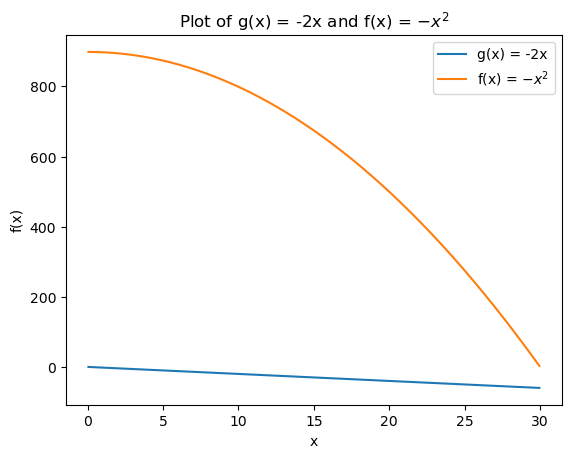

In [79]:
plt.plot(x[1:], gx[1:], label='g(x) = -2x')
plt.plot(x[1:], ans1[1:], label='f(x) = $-x^2$')
plt.title('Plot of g(x) = -2x and f(x) = $-x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Example 2:
solving equation : $\frac{df}{dx} + \frac{1}{4} f(x) = 0$ or  $\delta(x)$

In [80]:
deltax = np.zeros(n)
deltax[0] = 1/dx

solve equation :

In [81]:
ans2 = np.matmul(np.linalg.inv(D1x+np.eye(n)/4),deltax)

plot result :

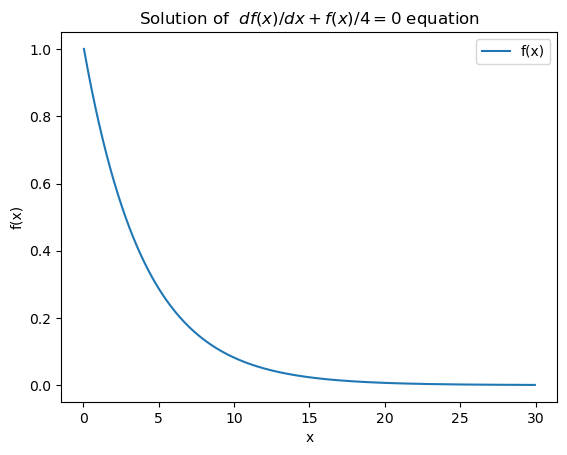

In [82]:
plt.plot(x[1:], ans2[1:], label='f(x)')
plt.title('Solution of  $ df(x) / dx + f(x)/4 = 0$ equation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Example 3:
solving equation of harmonic oscillator : $\frac{d^2f(x)}{dx^2} + f(x) = 0$ or $(\delta x)$

In [83]:
ans3 = np.matmul(np.linalg.inv(D2x +np.eye(n)),deltax)

plot result : 

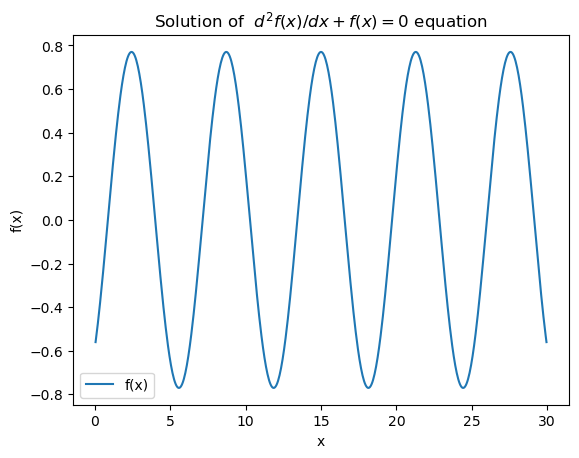

In [84]:
plt.plot(x[1:], ans3[1:], label='f(x)')
plt.title('Solution of  $ d^2f(x) / dx + f(x) = 0$ equation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Example 4:
solving equaiton of damped harmonic oscillator : $\frac{d^2f(x)}{dx^2} + \gamma \frac{df(x)}{dx} + f(x) = 0$ or \($\delta x$)


In [85]:
gamma = 0.5
ans4 = np.matmul(np.linalg.inv(D2x+gamma*D1x+np.eye(n)) , deltax)

plot result :

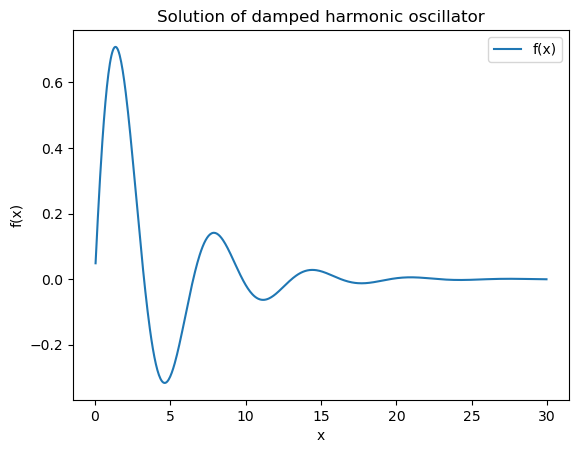

In [86]:
plt.plot(x[1:], ans4[1:], label='f(x)')
plt.title('Solution of damped harmonic oscillator')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Example 5:
solving equaiton of driven dampled harmonic oscillator : $\frac{d^2f(x)}{dx} + \gamma \frac{df(x)}{dx} + f(x) = g(x)$

In [87]:
gx2 = np.sin(x)
ans5 = np.matmul(np.linalg.inv(D2x+gamma*D1x+np.eye(n)),gx2)

plot result :

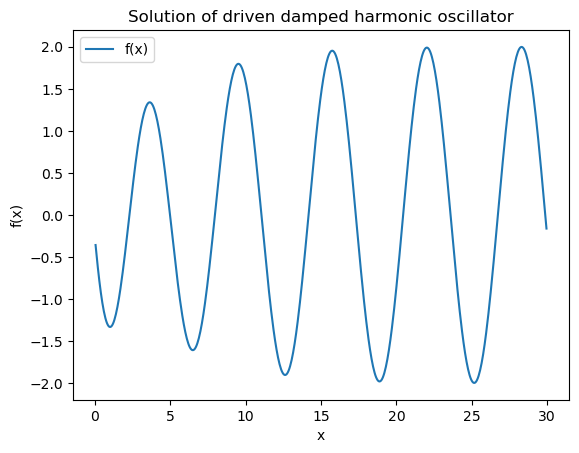

In [88]:
plt.plot(x[1:], ans5[1:], label='f(x)')
plt.title('Solution of driven damped harmonic oscillator')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()